In [3]:
from scipy.io import wavfile
from pesq import pesq
import os
from os import listdir
from pydub import AudioSegment
from scipy.io.wavfile import read, write
from IPython.display import Audio
import matplotlib.pyplot as plt
from pydub import AudioSegment, effects 
import random
from pydub.silence import split_on_silence
import numpy as np
import tqdm
import pandas as pd
import time

import pickle
import subprocess

import matplotlib.pyplot as plt
import numpy as np
import wave

In [9]:
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
from pydub import AudioSegment, silence
import librosa

In [10]:
# !pip install pyAudioAnalysis
# !pip install eyed3
# !pip install pydub
# !pip install hmmlearn
# !pip install --user imblearn
#!pip install plotly

In [15]:
# shows the sound waves
def visualize(path: str,sil=None):
    print(sil)
    raw = wave.open(path)
    signal = raw.readframes(-1)
    signal = np.frombuffer(signal, dtype ="int16")
    f_rate = raw.getframerate()
    time = np.linspace(
        0, # start
        len(signal) / f_rate,
        num = len(signal)
    )
    plt.figure(1)
    plt.title("Sound Wave")
    plt.xlabel("Time")
    plt.plot(time, signal)
    if sil:
        for i in sil:
            plt.axvline(x=i[0], color='red') 
            plt.axvline(x=i[1], color='red')
    plt.show()
    
    
    # shows the sound waves
def visualize_by_segment(AudioSegment: audio,sil=None):
    print(sil)
    
    signal = audio..readframes(-1)
    signal = np.frombuffer(signal, dtype ="int16")
    f_rate = raw.getframerate()
    time = np.linspace(
        0, # start
        len(signal) / f_rate,
        num = len(signal)
    )
    plt.figure(1)
    plt.title("Sound Wave")
    plt.xlabel("Time")
    plt.plot(time, signal)
    if sil:
        for i in sil:
            plt.axvline(x=i[0], color='red') 
            plt.axvline(x=i[1], color='red')
    plt.show()

In [16]:
files=['../speech.wav']


None


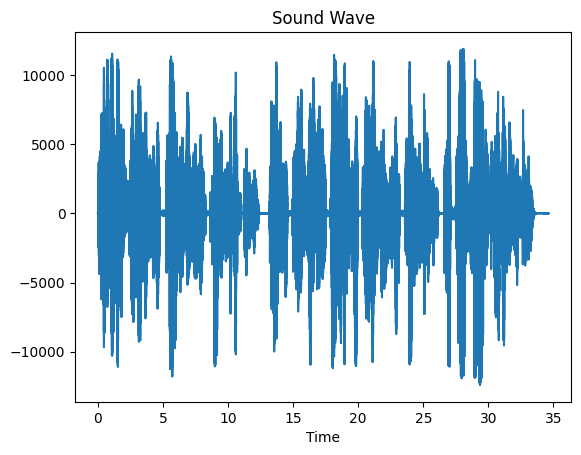

In [17]:
for file in files:
    visualize(file)

Pydub

[(4.748, 5.251), (8.255, 8.653), (10.925, 11.236), (12.296, 13.221), (14.545, 14.996), (17.491, 17.916), (19.959, 20.341), (23.17, 23.616), (26.078, 26.625), (27.072, 27.53), (33.361, 34.632)]
[(4.748, 5.251), (8.255, 8.653), (10.925, 11.236), (12.296, 13.221), (14.545, 14.996), (17.491, 17.916), (19.959, 20.341), (23.17, 23.616), (26.078, 26.625), (27.072, 27.53), (33.361, 34.632)]


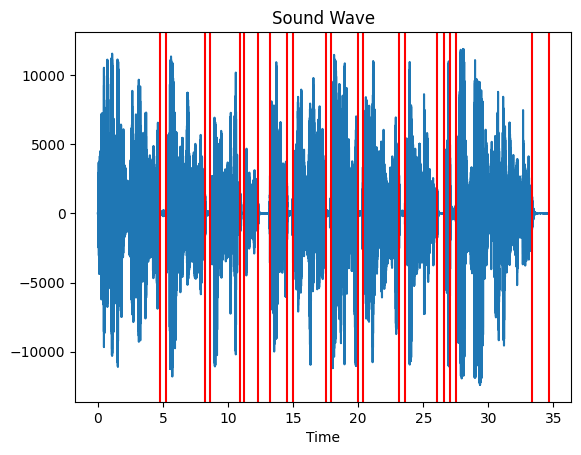

[(4.748, 5.251), (8.255, 8.653), (10.925, 11.236), (12.296, 13.221), (14.545, 14.996), (17.491, 17.916), (19.959, 20.341), (23.17, 23.616), (26.078, 26.625), (27.072, 27.53), (33.361, 34.632)]
[(4.748, 5.251), (8.255, 8.653), (10.925, 11.236), (12.296, 13.221), (14.545, 14.996), (17.491, 17.916), (19.959, 20.341), (23.17, 23.616), (26.078, 26.625), (27.072, 27.53), (33.361, 34.632)]


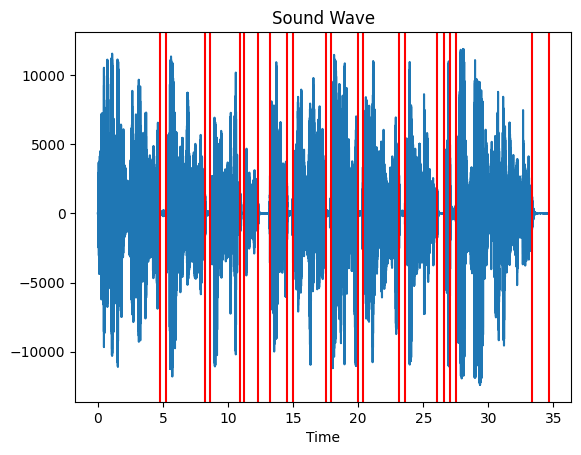

In [22]:
for file in [files[0],files[-1]]:   
    myaudio = AudioSegment.from_wav(file)

    silenc = silence.detect_silence(myaudio, min_silence_len=250, silence_thresh=-45)
    silenc = [((start/1000),(stop/1000)) for start,stop in silenc]
    print(silenc)
    if len(silenc)>0:
        visualize(file,silenc)

detect voice 

In [23]:
def getSilenceStartStopTime(audio):
    silenc = silence.detect_nonsilent(audio, min_silence_len=250, silence_thresh=-45)
    silenc = [((start/1000),(stop/1000)) for start,stop in silenc]
    print(silenc)
    return silenc

[(0.0, 4.748), (5.251, 8.255), (8.653, 10.925), (11.236, 12.296), (13.221, 14.545), (14.996, 17.491), (17.916, 19.959), (20.341, 23.17), (23.616, 26.078), (26.625, 27.072), (27.53, 33.361)]
[(0.0, 4.748), (5.251, 8.255), (8.653, 10.925), (11.236, 12.296), (13.221, 14.545), (14.996, 17.491), (17.916, 19.959), (20.341, 23.17), (23.616, 26.078), (26.625, 27.072), (27.53, 33.361)]
[(0.0, 4.748), (5.251, 8.255), (8.653, 10.925), (11.236, 12.296), (13.221, 14.545), (14.996, 17.491), (17.916, 19.959), (20.341, 23.17), (23.616, 26.078), (26.625, 27.072), (27.53, 33.361)]


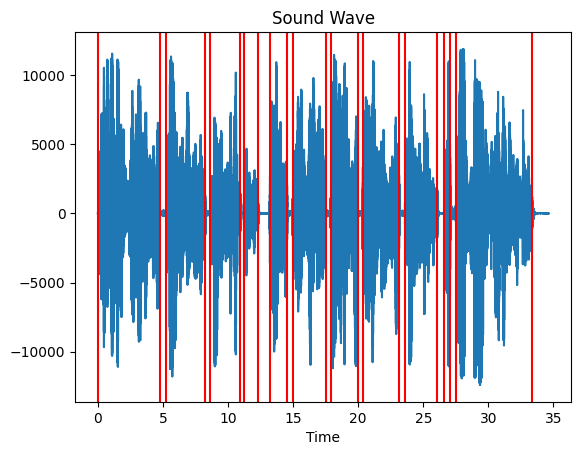

[(0.0, 4.748), (5.251, 8.255), (8.653, 10.925), (11.236, 12.296), (13.221, 14.545), (14.996, 17.491), (17.916, 19.959), (20.341, 23.17), (23.616, 26.078), (26.625, 27.072), (27.53, 33.361)]
[(0.0, 4.748), (5.251, 8.255), (8.653, 10.925), (11.236, 12.296), (13.221, 14.545), (14.996, 17.491), (17.916, 19.959), (20.341, 23.17), (23.616, 26.078), (26.625, 27.072), (27.53, 33.361)]
[(0.0, 4.748), (5.251, 8.255), (8.653, 10.925), (11.236, 12.296), (13.221, 14.545), (14.996, 17.491), (17.916, 19.959), (20.341, 23.17), (23.616, 26.078), (26.625, 27.072), (27.53, 33.361)]


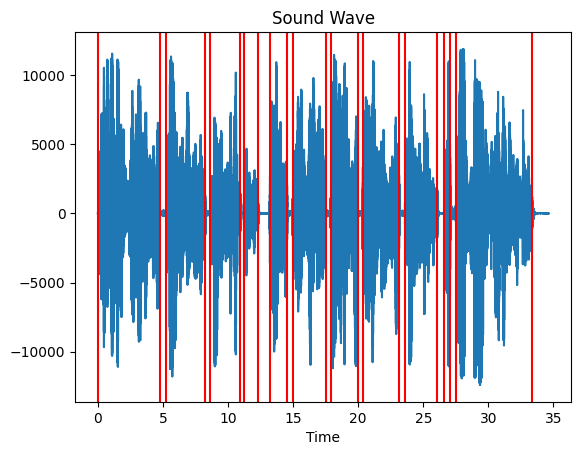

In [32]:
for file in [files[0],files[-1]]:   
    myaudio = AudioSegment.from_wav(file)

    silenc =getSilenceStartStopTime(myaudio)
    
    (start,stop)=silenc[-11]
    myaudio[start:stop]
    print(silenc)
    if len(silenc)>0:
        visualize(file,silenc)